#Análise de similaridade dos tuítes sobre a guerra na Ucrânia, de usuários relevantes

## Introdução

A guerra na Ucrânia teve início em 24 de fevereiro de 2022 e se tornou um assunto comentado mundialmente, principalmente nas redes sociais, como o Twitter. Este conflito, ainda em andamento, envolve diretamente a grande potência mundial Russa e a Ucrânia, e indiretamente diversos países e potências do resto do globo, em questões políticas, geológicas e ideológicas.




##Objetivo
Este trabalho tem como objetivo analisar a semelhança entre tuítes escritos sobre a guerra na Ucrânia, utilizando da métrica TF-IDF para a seleção de atributos. Serão analisados os tuítes postados por usuários com mais de 5 000 000 de seguidores no Twitter, durante um período de mais de 90 dias. Os datasets utilizados foram retirados do site Kaggle (https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows). O formato deste trabalho será de aplicação, contendo as fases de pré-processamento, mineração e pós-processamento.

##DataSet Original
O conjunto de dataset utilizado, retirado do site Kaggle, possui, até o momento,  34.21M tuítes, de diferentes usuários, postados em relação a guerra. Os parâmetros de busca destes tuítes foram as hashtags utilizadas junto a postagem. Para cada dia desde 27/02/2022, um novo arquivo com os tuítes relacionados daquele dia é postado no site (há algumas exceções).



Os datasets contém 17 colunas, com informações sobre o perfil do usuário e o tuíte postado. O enfoque principal é a coluna “text” que contém o texto do tuíte. Além disso, vale ressaltar a coluna “username”, “followers” e “language”, que contém as informações do nome do usuário, número de seguidores e idioma do tuíte (informações relevantes para o pré-processamento).


##Preparação

###Conectar-se ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Imports


A aplicação foi realizada em Python, com o objetivo de ter acesso a bibliotecas de processamento de linguagem natural (NLP) e aprendizado de máquina. Com isso, foram utilizadas bibliotecas para dar suporte às operações, e para implementar/aplicar os algoritmos propostos. 

Dentre elas, podemos citar: 
* Numpy, uma biblioteca de matemática computacional, focada em operações matemáticas e estruturas de dados otimizadas;
* Pandas, com a implementação do DataFrame, um tipo de estrutura de dados em formato de tabela, utilizado para a manipulação de dados para inteligência artificial;
* NLTK, com métodos e funções de processamento de linguagem natural, utilizado para aplicação do algoritmo de stemmização, e da lista de stop words; 
* SciKit Learn, uma biblioteca completa de aprendizado de máquina, com algoritmos de classificação, regressão, clusterização, etc, e métodos para a criação de atributos, como o TF-IDF; 
* SciPy, uma biblioteca open-source de softwares para matemática, ciência engenharia, que contém métodos como linkage e dendrogram para a implementação de clusters hierárquicos; 
* e Mlxtend (machine learning extensions), uma biblioteca especializada de aprendizado de máquina, com ferramentas úteis para as atividades diárias de ciência de dados, sendo utilizada para a aplicação do algoritmo de regras de associação.

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


##Pré-Processamento



###Criação e Leitura



Primeiramente, os datasets foram filtrados baseando-se nos valores das colunas “language” e “followers”: apenas os tuítes em idioma inglês (“eng”) cujo usuário possui o número de seguidores maior que 5 000 000 foram selecionados e separados em um único dataset.

Abaixo, o trecho responsável pela criação do DataSet. Atualmente selecionado para ser armazenado em formato *.csv* na pasta */content/drive/MyDrive/Machine Learning/DataSets*, do Google Drive.

In [ ]:
dir  = '/content/drive/MyDrive/Machine Learning/UkraineAllEngTwT.csv'
allEngDt = open(dir, 'w')
allEngDt.close()
header = True
for file in os.scandir("/content/drive/MyDrive/Machine Learning/DataSets"):
    allEngDt = open(dir, 'a')
    dt = pd.read_csv(file.path, sep = ",", dtype = str, encoding = "utf-8", encoding_errors = "ignore", low_memory = True, index_col = 0)
    dt = dt.loc[dt.loc[:,'language'].str.contains("en")]
    dt = dt[pd.to_numeric(dt.followers) > 5000000]
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        allEngDt.write(dt.to_csv(header = header))
    #allEngDt.write('\n')
    header = False
    allEngDt.close()

Abaixo, os trechos responsáveis por ler o DataSet criado pelo trecho acima, atribuindo-o a variável *dt*, utilizando a estrutura de dado *Dataframe*, implementada pela biblioteca *Pandas*

######Endereço do Google Drive utilizado por Gustavo

In [3]:
dir = '/content/drive/MyDrive/Machine Learning/UkraineAllEngTwT_Correct.csv'
dt = pd.read_csv(dir, sep = ",", low_memory = False, on_bad_lines='skip', usecols = range(0,18))


######Endereço do Google Drive utilizado por Nayara

In [ ]:
dir  = '/content/drive/MyDrive/listas e trabalhos em grupo (arq. compartilhado)/Machine Learning/UkraineAllEngTwT.csv'
dt = pd.read_csv(dir, sep = ",", low_memory = False, on_bad_lines='skip', usecols = range(0,18))

######Print de um usuário *i* qualquer selecionado do Dataset *dt*

In [ ]:
i = 5632
dt.loc[i,:]
#for j in dt.columns.values:
    #print(f"{j}: {dt.loc[i, j]}")

Unnamed: 0                                                   332446
userid                                                   1115874631
username                                               CGTNOfficial
acctdesc          CGTN is an international media organization. I...
location                                             Beijing, China
following                                                        74
followers                                                  13383261
totaltweets                                                  216669
usercreatedts                            2013-01-24 03:18:59.000000
tweetid                                         1509300280248217600
tweetcreatedts                           2022-03-30 22:43:22.000000
retweetcount                                                      1
text              #Ukraine and #Russia had hold the 5th round of...
hashtags          [{'text': 'Ukraine', 'indices': [0, 8]}, {'tex...
language                                        

###Tokenização




Após esta etapa, para cada usuário, separamos os tuítes e aplicamos uma tokenização junto a um filtro com as stop words (transformação dos textos em uma lista de tokens, junto a remoção de palavras baseadas nas stop words, uma lista de palavras para serem removidas antes de se aplicar operações de NLP), seguido de uma stemmização dos tokens (transformação desses tokens nos radicais das palavras, baseando-se em dicionários da língua nativa - lemmatizer)

Função de tokenização utilizando o *lemmatizer*, implementado pela biblioteca NLTK. O método também realiza as seguintes transformações:

* Remoção de *'* no início de algumas palavras
* Valores numéricos para *numericalValue*
* Links para outros tuítes para *//t.co/*

In [4]:
def tokenize(text):
    lt = WordNetLemmatizer()
    pattern1 = re.compile("^//t.co/")
    tokens = word_tokenize(text)
    stems = []
    for item in tokens:
        item = item.lstrip("'")
        if(any(char.isdigit() for char in item)):
            stems.append('numericalValue')
        elif (pattern1.match(item)):
            stems.append('//t.co/')       
        else:
            stems.append(lt.lemmatize(item))
    return stems

Criação da lista de palavras que serão utilizadas como atributos, utilizando da tokenização, junto a lista de stopwords baixada através da biblioteca NTLK, e incrementada com símbolos diversos, que apareciam na lista de palavras

In [5]:
sw = [*stopwords.words(), *[':', ',', '|', '.', '?', '(', ')', "'s", "n't", "''", '""', '``', '!', '[', ']', ';', '...', '`', "'", '-', '--', '/', ' ', '\0', '']]
vectorizer = TfidfVectorizer(use_idf = True, tokenizer = tokenize, decode_error = 'ignore', strip_accents = 'ascii', stop_words = sw)
wordList = []
for user in dt.loc[:,"username"].unique():
    twtList = []
    for tweet in dt.loc[dt.loc[:, "username"] == user].text:
        twtList.append(tweet)

    tfIdf = vectorizer.fit_transform(twtList)
    dtTest = pd.DataFrame(tfIdf[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=[user])
    dtTest = dtTest.sort_values(user, ascending=False)    
    
    wordList = [*wordList, *list(dtTest.index)]


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['^', 'acaba', 'acesti', 'aiba', 'altal', 'altalaban', 'altms', 'amig', 'arasnda', 'arrol', 'artq', 'aslnda', 'astia', 'ate', 'aveti', 'avon', 'avra', 'avro', 'azert', 'aztan', 'azutan', 'bade', 'bae', 'bar', 'baz', 'bel', 'belul', 'bilr', 'birkac', 'birsey', 'bizlr', 'blk', 'bos', 'brzcas', 'brzkone', 'bunlarn', 'butun', 'bzi', 'bzn', 'caci', 'carei', 'caror', 'carui', 'cate', 'cati', 'catva', 'cem', 'cemer', 'cemerkoli', 'cemu', 'cemur', 'cemurkoli', 'ceprav', 'ceravno', 'cesa', 'cesar', 'cesarkoli', 'cetrta', 'cetrte', 'cetrtega', 'cetrtem', 'cetrtemu', 'cetrti', 'cetrtih', 'cetrtim', 'cetrtima', 'cetrtimi', 'cetrto', 'cetudi', 'cez', 'cezenj', 'ceznje', 'cigar', 'cigav', 'cigava', 'cigave', 'cigavega', 'cigavem', 'cigavemu', 'cigavi', 'cigavih', 'cigavim', 'cigavima', 'cigavimi', 'cigavo',

###Redução de Dimensionalidade - Filtro de Palavras




Um dos problemas com abordagem utilizada posteriormente é o grande número de palavras diferentes, utilizadas pelos diversos usuários. Para resolver este problema foi realizado um filtro de palavras baseadas naquelas que aparecem para uma  porcentagem *p* de usuários. Com isso, só serão avaliadas as palavras que ocorrem em tuítes de uma porcentagem dos usuários. O dataset final, para *p = 15%* é composto por 114 linhas, cada uma representando um dos usuários selecionados, e 157 colunas, uma para cada palavra selecionada pelo filtro.

In [6]:
p = 0.15
wL = np.array(wordList)
wordF = np.round(np.unique(dt.userid).size * p)
print("Percentage:" + str(p))
print("Word Frequency:" + str(wordF))

wLAux, c = np.unique(wL, return_counts = True)
wLduplicates = wLAux[c > wordF]
wLunique = wLAux[c <= wordF]

print("Duplicates:")
print(wLduplicates.size)
wLduplicates


Percentage:0.15
Word Frequency:17.0
Duplicates:
157


array(['#', '$', '%', '&', '//t.co/', '@', 'across', 'aid', 'amid', 'amp',
       'another', 'around', 'attack', 'back', 'biden', 'border', 'bring',
       'bucha', 'call', 'child', 'china', 'city', 'civilian', 'conflict',
       'continue', 'continues', 'could', 'council', 'country', 'crisis',
       'day', 'despite', 'east', 'effort', 'emergency', 'europe', 'even',
       'every', 'family', 'far', 'fighting', 'first', 'food', 'force',
       'foreign', 'full', 'future', 'gas', 'get', 'give', 'global', 'go',
       'good', 'government', 'head', 'help', 'home', 'http', 'human',
       'humanitarian', 'including', 'india', 'international', 'invasion',
       'keep', 'kharkiv', 'killed', 'know', 'kyiv', 'last', 'latest',
       'leader', 'leave', 'left', 'let', 'life', 'like', 'live', 'loss',
       'made', 'make', 'many', 'march', 'mariupol', 'may', 'meet',
       'meeting', 'military', 'million', 'minister', 'month', 'much',
       'nato', 'need', 'never', 'new', 'news', 'next', 'nucle

###TF-IDF

A partir dos tokens, foi calculado a métrica TF-IDF (term frequency–inverse document frequency) para cada conjunto de tuítes de cada usuário. A métrica TF-IDF se trata de uma medida estatística que busca ponderar as palavras mais frequentes e com maior significância dentro dos tuítes.

O valor TF-IDF cresce proporcionalmente a frequência que as palavras aparecem dentro do texto, porém se baseia na ideia de que palavras com maiores e menores frequências são, na maioria dos casos, menos relevantes para a diferenciação do texto, pois tratam-se de conectivos e palavras muito comuns, ou palavras pouco utilizadas, respectivamente. A partir dos valores atribuídos aos tokens, obtemos uma lista das palavras mais relevantes conforme a métrica proposta, que será utilizado para análise de similaridade.

In [7]:
tfIdfDF = {}
for user in dt.loc[:,"username"].unique():
    twtList = []
    for tweet in dt.loc[dt.loc[:, "username"] == user].text:
        twtList.append(tweet)

    tdIdf = vectorizer.fit_transform(twtList)
    tfIdfnames = vectorizer.get_feature_names_out()
    dAux = {}
    for x in wLduplicates:
        if (len(np.where(tfIdfnames == x)[0]) != 0):
            index = np.where(tfIdfnames == x)[0][0]
            dAux[x] = tdIdf[0].T.todense()[index,0]
    tfIdfDF[user] = dAux

tfIdfDF = pd.DataFrame(tfIdfDF)
tfIdfDF = tfIdfDF.transpose()

Criação do DataSet final, utilizando do *Dataframe* resultado do algoritmo *TF-IDF* e substituindo os valores *N.A.* por *0.0*.

In [8]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(list(tfIdfDF.columns))

DF = tfIdfDF.fillna(0).astype('double')
DF

,#,$,%,&,//t.co/,@,across,aid,amid,amp,...,video,wa,watch,way,week,woman,work,world,would,year
IndiaToday,0.111044,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
htTweets,0.096142,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the_hindu,0.119334,0.0,0.0,0.0,0.000000,0.322511,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TimesNow,0.245121,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ndtv,0.203021,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEDTalks,0.208514,0.0,0.0,0.0,0.000000,0.208514,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.208514,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SkySports,0.277350,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBCNews,0.824163,0.0,0.0,0.0,0.000000,0.137361,0.0,0.0,0.0,0.0,...,0.137361,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paugasol,0.200000,0.0,0.2,0.0,0.000000,0.200000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Mineração

Para a etapa da mineração, dois algoritmos foram aplicados. O primeiro algoritmo aplicado foi a clusterização hierárquica. Essa clusterização agrupa os objetos do Dataset utilizando uma métrica e um método diferente. Para este trabalho, foi utilizada a métrica do cosseno junto de dois métodos diferentes de clusterização, single e o complete. O segundo algoritmo foi o apriori em conjunto das regras de associação, que permitem encontrar a relação entre os atributos do Dataset, utilizando algumas métricas comparativas e de dependência.


###Clusterização Hierárquica

 A métrica de cosseno é utilizada para medir a semelhança entre objetos de um mesmo conjunto de dados e é obtida através do cosseno do ângulo entre vetores no espaço (produto escalar entre os vetores dividido pelo produto de seus comprimentos). Dessa forma, para um caso geral, a similaridade de cosseno pertence ao intervalo [-1,1], onde vetores proporcionais tem uma similaridade de cosseno igual a 1, vetores ortogonais possuem similaridade 0, e vetores opostos possuem similaridade -1. Como os atributos possuem apenas valores positivos, este intervalo se limita a [0,1].


Já os métodos single e complete são qual abordagem será utilizada para calcular a distância a partir da métrica utilizada. O método single utiliza da menor distância entre dois clusters, enquanto o método complete utiliza da maior. O algoritmo de clusterização hierárquica inicia o agrupamento a partir de grupos de um único objeto, e expande esses grupos até a existência de um único cluster com todos os objetos do Dataset. O processo de expansão dos clusters se diferencia através da métrica e do método escolhido.


Ou seja, para a análise dos usuários, cada objeto (usuário do Twitter) teve como atributos as diferentes palavras presentes nos tuítes realizados por aquele usuário, filtradas a partir de uma porcentagem arbitrária de usuários que utilizaram aquelas mesmas palavras, com sua TF-IDF calculada. Com isso, cada objeto teve sua métrica do cosseno calculada, e, com isso, foram clusterizados pelo algoritmo de clusterização hierárquica. A partir da clusterização, foram criados dois dendrogramas, um para cada método escolhido, que serão utilizados posteriormente, na etapa de pós-processamento, para analisar a relação entre os usuários.

####Single
Clusterização a partir da métrica do cosseno e do método *single* de cálculo de distância

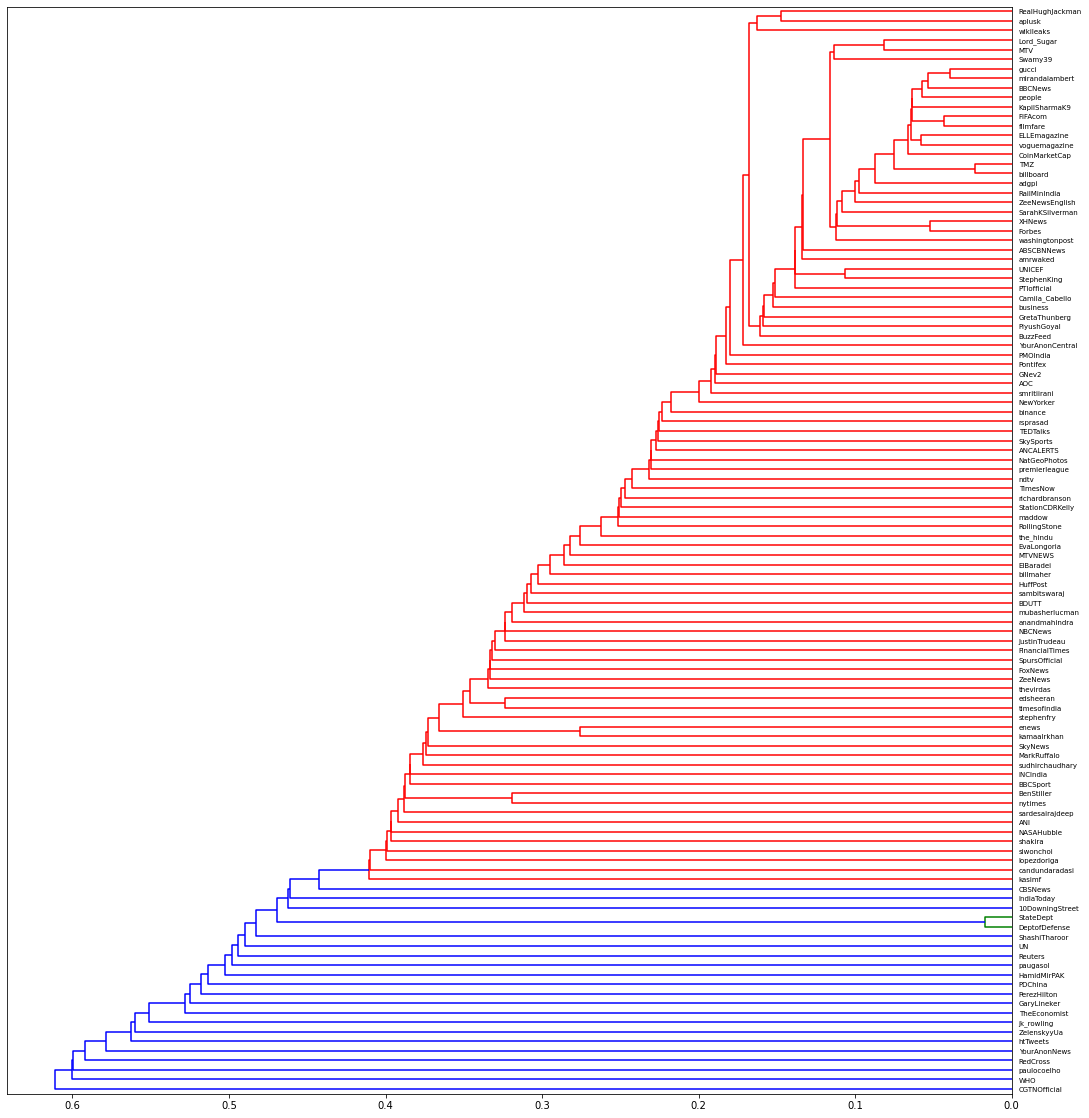

In [15]:
clustering = linkage(DF, method = 'single', metric = 'cosine')

dn = dendrogram(clustering, orientation = 'left', labels = DF.index, leaf_font_size = 7)
mpl.rcParams['figure.figsize'] = [10, 25]
plt.show()

####Complete
Clusterização a partir da métrica do cosseno e do método *single* de cálculo de distância

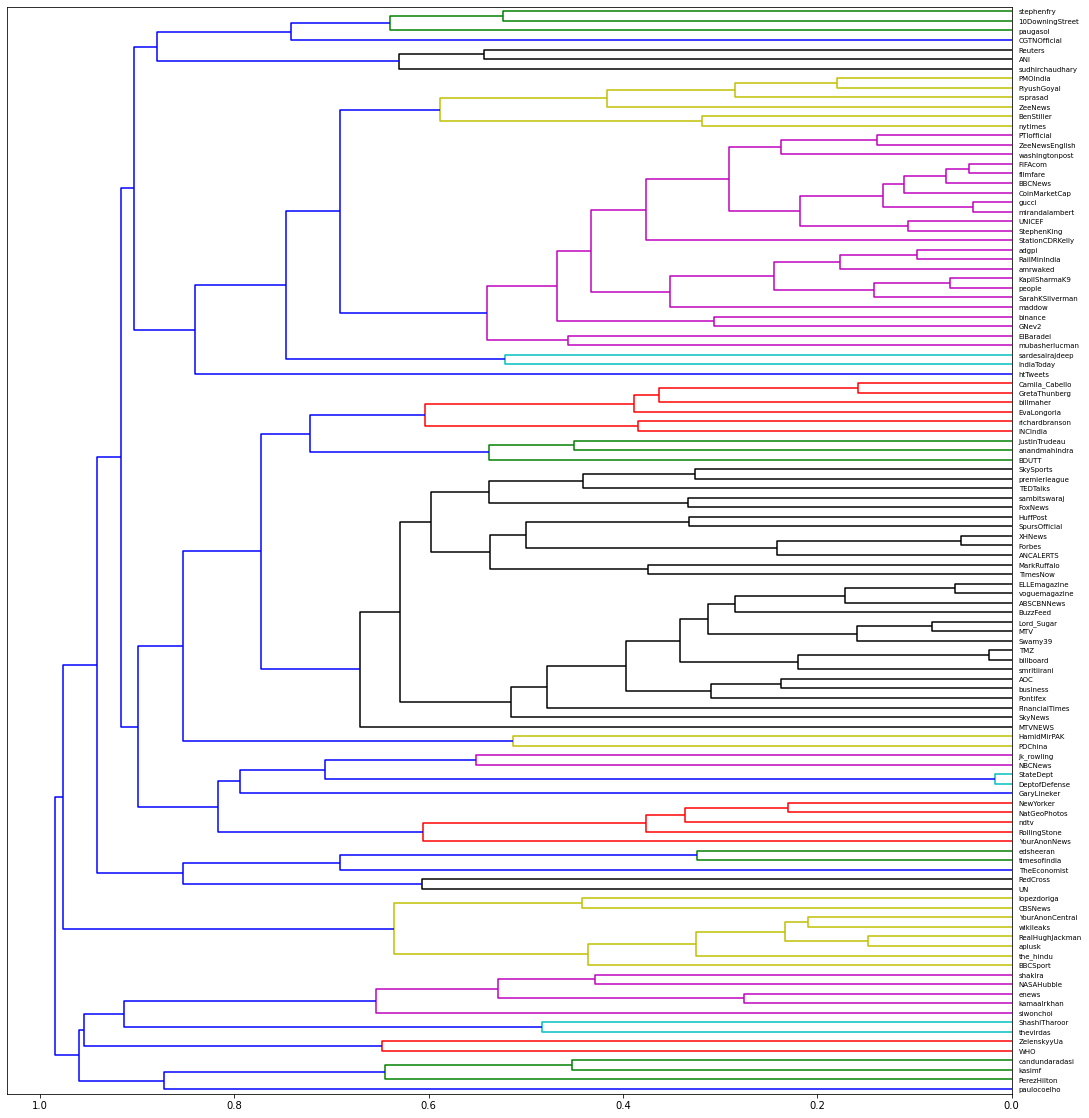

In [14]:
clustering = linkage(DF, method = 'complete', metric = 'cosine')

dn = dendrogram(clustering, orientation = 'left', labels = DF.index, leaf_font_size = 7)
mpl.rcParams['figure.figsize'] = [18, 20]
plt.show()

###Regras de Associação com Apriori

Já o algoritmo apriori consiste na identificação dos diferentes conjuntos (sets) de atributos que frequentemente aparecem no Dataset. Com os sets de itens definidos, o algoritmo de regras de associação calcula diferentes métricas de associação para a descoberta de relações entre os sets de atributos adquiridos pelo apriori. Uma associação (relação) A → B é composta de um set antecedente (A) e um set consequente (B).


As métricas calculadas são:
* *support* (*range: [0,1]*), que consiste na frequência/importância de uma relação num Dataset;
* *confidence* (*range: [0,1]*), que consiste na probabilidade de um set consequente acontecer, dado um set antecedente. Caso seja 1, o consequente sempre acontece caso haja o antecedente;
* *lift* (*range: [0,∞]*), que consiste na medida de quanto o antecedente e o consequente apareceriam juntos para caso eles fossem independentes. Caso seja 1, eles são independentes;
* *leverage* (*range: [-1,1]*), que consiste no cálculo da diferença entre a frequência observada do antecedente e consequente aparecerem juntos e a frequência que seria esperada se ambos fossem independentes. Um valor de 0 indica independência;
* e *conviction* (*range: [0, ∞]*), que consiste na métrica de dependência do consequente perante o antecedente. O valor perfeito de conviction será retratado como inf, enquanto a independência é retratada como 1.

Ou seja, para a análise dos atributos, foram calculadas as regras de associação das frequências TF-IDF das palavras filtradas de cada um dos conjuntos de tuítes dos usuários selecionados, a partir dos sets de palavras selecionadas pelo algoritmo apriori. Para  este trabalho, foram selecionados sets com support acima de 50% e regras de associação com confidence acima de 60%, resultando em 43 regras dadas como interessantes pelo algoritmo. Estas regras serão analisadas na etapa de pós-processamento.

In [11]:
BoolDF = DF[:].astype(bool).copy()

apri = apriori(BoolDF, min_support = 0.5, use_colnames = True)
rules = association_rules(apri, metric = "confidence", min_threshold = 0.6)

rules = rules[["antecedents", "consequents", "support", "confidence", "lift", "leverage", "conviction"]]
rules

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(#),(http),0.894737,0.894737,1.000000,0.000000,1.000000
1,(http),(#),0.894737,1.000000,1.000000,0.000000,inf
2,(#),(numericalValue),0.868421,0.868421,1.000000,0.000000,1.000000
3,(numericalValue),(#),0.868421,1.000000,1.000000,0.000000,inf
4,(ukraine),(#),0.622807,1.000000,1.000000,0.000000,inf
5,(#),(ukraine),0.622807,0.622807,1.000000,0.000000,1.000000
6,(http),(numericalValue),0.815789,0.911765,1.049911,0.038781,1.491228
7,(numericalValue),(http),0.815789,0.939394,1.049911,0.038781,1.736842
8,(ukraine),(http),0.561404,0.901408,1.007457,0.004155,1.067669
9,(http),(ukraine),0.561404,0.627451,1.007457,0.004155,1.012465


##Pós-Processamento e Conclusão

### Pós-Processamento

A partir das abordagens de mineração selecionadas, é possível analisar os resultados obtidos desta etapa e, assim, chegar a conclusões sobre a relação entre os tuítes e dos usuários em inglês com mais de 5 000 000 seguidores.



Analisando o primeiro dendograma, gerado a partir do método de distância single, é possível perceber que, durante a separação de um cluster em novos, é separado um único objeto, contra um grupo de objetos que ainda não foram separados. Essa característica deve-se pelo fato que os objetos clusterizados não possuem relação e, portanto, não há características comuns para agrupar a maioria dos objetos em grupos.

Além disso, ao analisarmos o segundo dendrograma, é possível perceber o agrupamento de alguns poucos grupos interessantes. Exemplos seriam o agrupamento do Departamento de Defesa dos EUA (username: DeptofDefense) junto do Departamento do Estado dos EUA (username: StateDept); ou do agrupamento do WikiLeaks (username: wikileaks), organização sem fins lucrativos que tem  por objetivo vazar notícias e mídia confidencial para a internet, junto a uma das contas ditas ser relacionada com o grupo de ativistas sociais e hacktivistas Anonymous (username: YourAnonCentral). Porém, além dessas e algumas outras poucas relações, não há uma consistência dos grupos perante tipos de conta como de jornais e canais de notícia, como BBC ou CNN; atores e cantores, como Mark Ruffalo; e grandes sites de entretenimento ou cosméticos, como a marca de roupas Gucci. Todos esses grupos estão misturados dentro dos mesmos clusters gerados pelo algoritmo de clusterização hierárquica, fazendo com que não seja possível encontrar nenhum grupo de interesse dentro dos clusters gerados.


Por último, levando em conta as regras de associação, os valores de *lift* e *leverage* indicam uma independência dos sets encontrados pelo algoritmo apriori. Levando em conta que valores de *lift* iguais a 1 indicam independência, o maior valor de *lift* encontrado é igual a *lift* = 1.08, enquanto o menor valor é igual a *lift* = 1.00; já para *leverage*, valores iguais a 0 indicam independência, sendo que o maior valor de leverage encontra é igual a *leverage = 0.04*, enquanto o menor valor é igual a *leverage = 0.00*. Ambos valores indicam que as relações retratadas mais importantes pelo algoritmo acontecem com sets de palavras independentes entre si. Além disso, o conjunto de palavras que foram selecionadas pelo apriori e pertencem a diferentes sets de interesse é muito pequeno. Dos 157 atributos, apenas as palavras #, ukraine, http e numericalValue, aparecem nas relações.


### Conclusão


Com isso, é possível concluir que não há relação das palavras utilizadas com os usuários selecionados. As palavras são, em sua maior parte, independentes entre si e os textos dos diversos usuários não seguem um padrão de uso delas. Os pequenos clusters interessantes criados indicam que pode existir uma consistência de uso para grupos muito específicos de usuários, mas que isso não é uma regra. Algo importante a se notar é o valor de support alto para as palavras *#*, *http* e *ukraine*, indicando que os tuítes dos usuários com o maior número de seguidores consequentemente utilizam de hashtags, links e das palavras chaves para atrair leitores para seus tuítes, ferramentas de conhecimento comum para o aumento do alcance de uma conta no Twitter.

##Bibliografia

https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html 
https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ 
https://pandas.pydata.org/ 
https://numpy.org/ 
https://www.nltk.org/_modules/nltk/stem/wordnet.html 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 